In [1]:
!pip install Spotipy

In [2]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
import random
from functools import reduce

In [4]:
!pip install -r requirements.txt

In [337]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '' # Client Secret; copy this from your app
username = 'sanjsarda' # Your Spotify username
redirect_uri = 'https://example.com'

# Once the Authorisation is complete, we just need to `sp` to call the APIs
scope = 'user-top-read user-read-recently-played user-follow-read playlist-modify-public user-library-read playlist-read-collaborative'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [338]:
def get_tracks (sp,genre,popularity=50,limit=100):
    recos=sp.recommendations(seed_genres=genre,limit=limit, min_popularity=popularity)
    track_ids=[]
    for track in recos['tracks']:
        album_id=track['album']['id']
        album_tracks=sp.album_tracks(album_id)
        for track in album_tracks['items']:
            track_ids.append(track['id'])
    return track_ids

In [339]:
x=get_tracks(sp,['acoustic'])

In [340]:
len(x)

1192

In [9]:
def get_user_profile(sp):
    results_favorite= sp.current_user_top_tracks(limit=25, offset=0,time_range='medium_term')
    results_recents= sp.current_user_recently_played(limit=25)
    
    track_name = []
    track_id = []
    artist = []
    artist_id = []
    album = []
    duration = []
    popularity = []
    genres= set()
    
    for i, items in enumerate(results_favorite['items']):
        track_name.append(items['name'])
        track_id.append(items['id'])
        artist.append(items["artists"][0]["name"])
        artist_id.append(items["artists"][0]["id"])
        genres.update(sp.artist(items["artists"][0]["id"])['genres'])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])
        
    for i, items in enumerate(results_recents['items']):
        track_name.append(items['track']['name'])
        track_id.append(items['track']['id'])
        artist.append(items['track']["artists"][0]["name"])
        artist_id.append(items['track']["artists"][0]["id"])
        genres.update(sp.artist(items['track']["artists"][0]["id"])['genres'])
        duration.append(items['track']["duration_ms"])
        album.append(items['track']["album"]["name"])
        popularity.append(items['track']["popularity"])
        
        
    df_user = pd.DataFrame({ "track_name": track_name, 
                             "album": album, 
                             "track_id": track_id,
                             "artist": artist, 
                             "artist_id": artist_id,
                             "duration": duration, 
                             "popularity": popularity})
    
    df_user.drop_duplicates(keep='first',inplace=True)
    return df_user, genres

In [10]:
user_profile, user_genres=get_user_profile(sp)

In [11]:
user_profile

,track_name,album,track_id,artist,artist_id,duration,popularity
0,Knew You,Here In Your Bedroom,0WfV9XwpkldKdjzw4qoyAd,Kailee Morgue,245PKF3hKjtxJKIG153kF0,185408,40
1,Flower Shops (feat. Morgan Wallen),Flower Shops (feat. Morgan Wallen),2ccuOtUjIyx3tPcsnpeBzJ,ERNEST,4GGfAshSkqoxpZdoaHm7ky,214405,80
2,Backseat (Kiss Me),Backseat (Kiss Me),7dbnw3cDgeDxOxJJ7QiAiD,Jutes,53fzjsJnjEKkA6TdncuIM4,166060,54
3,He Went To Jared (HARDY feat. Morgan Wallen),He Went To Jared (HARDY feat. Morgan Wallen),25uzAwyPekZtWzlLVvUYNS,HARDY,5QNm7E7RU2m64l6Gliu8Oy,213693,51
4,lie to me,lie to me,4f9IfFvBFm7Gsf1IVEudyf,Tate McRae,45dkTj5sMRSjrmBSBeiHym,177440,71
5,Taste of You,Taste of You,655sojH8GGEteZTBJOFyy7,Rezz,4aKdmOXdUKX07HVd3sGgzw,167606,64
6,One of Them Nights,One of Them Nights,4ks4jp4jGsmffhbUegLG6S,Chris Young,4BYxqVkZyFjtik7crYLg5Q,162520,38
7,Beggin',Conquest,4YeKAwFn69ehnciOfi7Sbf,Madcon,6c4sUNBgdonFJz8Kx2VsGz,218706,65
8,come over,After Midnight,6PGJZEvtlf2EJPu9VLqI3q,12AM,4FHtVj8v4il9h5HRQ4Ib3n,126087,15
9,The Reason,The Reason (15th Anniversary Deluxe),77loZpT5Y5PRP1S451P9Yz,Hoobastank,2MqhkhX4npxDZ62ObR5ELO,232800,83


In [12]:
len(user_genres)

89

In [13]:
def get_genres(sp, track_ids):
    genres= set()
    for track_id in track_ids:
        genres.update(sp.artist(track_id)['genres'])
    return genres  

In [14]:
def genre_consistency(sp,predicted_playlist_genres,user_genres):
    genre_consistency= len(predicted_playlist_genres.intersection(user_genres))/len(predicted_playlist_genres)
    return genre_consistency

In [15]:
def get_recently_played_track_ids(sp):
    results_recents= sp.current_user_recently_played(limit=50)
    track_id = []
    for i, items in enumerate(results_recents['items']):
        track_id.append(items['track']['id'])
    return track_id

In [16]:
def song_newness(sp, predicted_playlist):
    number_of_new_tracks=0
    for track in predicted_playlist:
        if not sp.current_user_saved_tracks_contains([track]) and track not in get_recently_played_track_ids(sp):
            number_of_new_tracks+=1
    return number_of_new_tracks*100/len(predicted_playlist)

In [17]:
genre_consistency(sp,user_genres,user_genres)

1.0

In [18]:
song_newness(sp,user_profile['track_id'])

0.0

## Encoding Audio Features

In [20]:
def fetch_audio_features(sp, df):
    playlist = df[['track_id','track_name', 'artist_id']] 
    index = 0
    audio_features = []
    genres = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
        
    index = 0
    while index < playlist.shape[0]:
        genres += [sp.artist('spotify:artist:'+ playlist.iloc[index, 2])['genres']]
        index += 1
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness'],
                              features['mode']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness','duration_ms', 'key',
                                                             'valence', 'speechiness', 'mode',])
    df_audio_features['genres'] = genres
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [21]:
audio_features=fetch_audio_features(sp,user_profile)

In [22]:
audio_features

,track_id,artist_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode,genres
track_name,,,,,,,,,,,,,,,
Knew You,0WfV9XwpkldKdjzw4qoyAd,245PKF3hKjtxJKIG153kF0,0.624,0.007250,0.5620,109.958,0.000003,-6.455,0.0937,185409,0,0.4780,0.0285,1,"[alt z, dark pop, electropop, indie electropop..."
Flower Shops (feat. Morgan Wallen),2ccuOtUjIyx3tPcsnpeBzJ,4GGfAshSkqoxpZdoaHm7ky,0.527,0.118000,0.4610,128.153,0.000000,-5.908,0.0831,214405,7,0.2270,0.0269,1,[]
Backseat (Kiss Me),7dbnw3cDgeDxOxJJ7QiAiD,53fzjsJnjEKkA6TdncuIM4,0.750,0.111000,0.5480,101.031,0.000000,-7.704,0.0633,166061,2,0.4970,0.0492,1,"[emo rap, sad rap, trap soul]"
He Went To Jared (HARDY feat. Morgan Wallen),25uzAwyPekZtWzlLVvUYNS,5QNm7E7RU2m64l6Gliu8Oy,0.565,0.054000,0.8060,140.084,0.000008,-5.110,0.2040,213693,9,0.6830,0.0482,0,[contemporary country]
lie to me,4f9IfFvBFm7Gsf1IVEudyf,45dkTj5sMRSjrmBSBeiHym,0.642,0.015100,0.3920,138.065,0.000000,-7.846,0.3520,177440,4,0.0479,0.0372,0,"[alt z, pop, post-teen pop]"
Taste of You,655sojH8GGEteZTBJOFyy7,4aKdmOXdUKX07HVd3sGgzw,0.667,0.006400,0.6790,100.054,0.000053,-6.616,0.1700,167606,0,0.3200,0.0475,1,"[canadian electronic, edm, electra, electro ho..."
One of Them Nights,4ks4jp4jGsmffhbUegLG6S,4BYxqVkZyFjtik7crYLg5Q,0.521,0.042200,0.8830,80.982,0.000000,-3.807,0.1050,162520,1,0.8050,0.0616,1,"[contemporary country, country, country road, ..."
Beggin',4YeKAwFn69ehnciOfi7Sbf,6c4sUNBgdonFJz8Kx2VsGz,0.715,0.028400,0.7960,129.040,0.000000,-4.889,0.0658,218707,4,0.4310,0.0534,0,"[dance pop, norwegian hip hop, pop rap]"
come over,6PGJZEvtlf2EJPu9VLqI3q,4FHtVj8v4il9h5HRQ4Ib3n,0.865,0.289000,0.4980,108.062,0.000001,-8.311,0.6900,126088,7,0.8080,0.2880,0,"[canadian contemporary r&b, sad rap, trap soul]"


In [23]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, Knew You to Piano Concerto No. 2 in B-Flat Major, Op. 19: III. Rondo: Molto allegro
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          49 non-null     object 
 1   artist_id         49 non-null     object 
 2   danceability      49 non-null     float64
 3   acousticness      49 non-null     float64
 4   energy            49 non-null     float64
 5   tempo             49 non-null     float64
 6   instrumentalness  49 non-null     float64
 7   loudness          49 non-null     float64
 8   liveness          49 non-null     float64
 9   duration_ms       49 non-null     int64  
 10  key               49 non-null     int64  
 11  valence           49 non-null     float64
 12  speechiness       49 non-null     float64
 13  mode              49 non-null     int64  
 14  genres            49 non-null     object 
dtypes: float64(9), int64(3

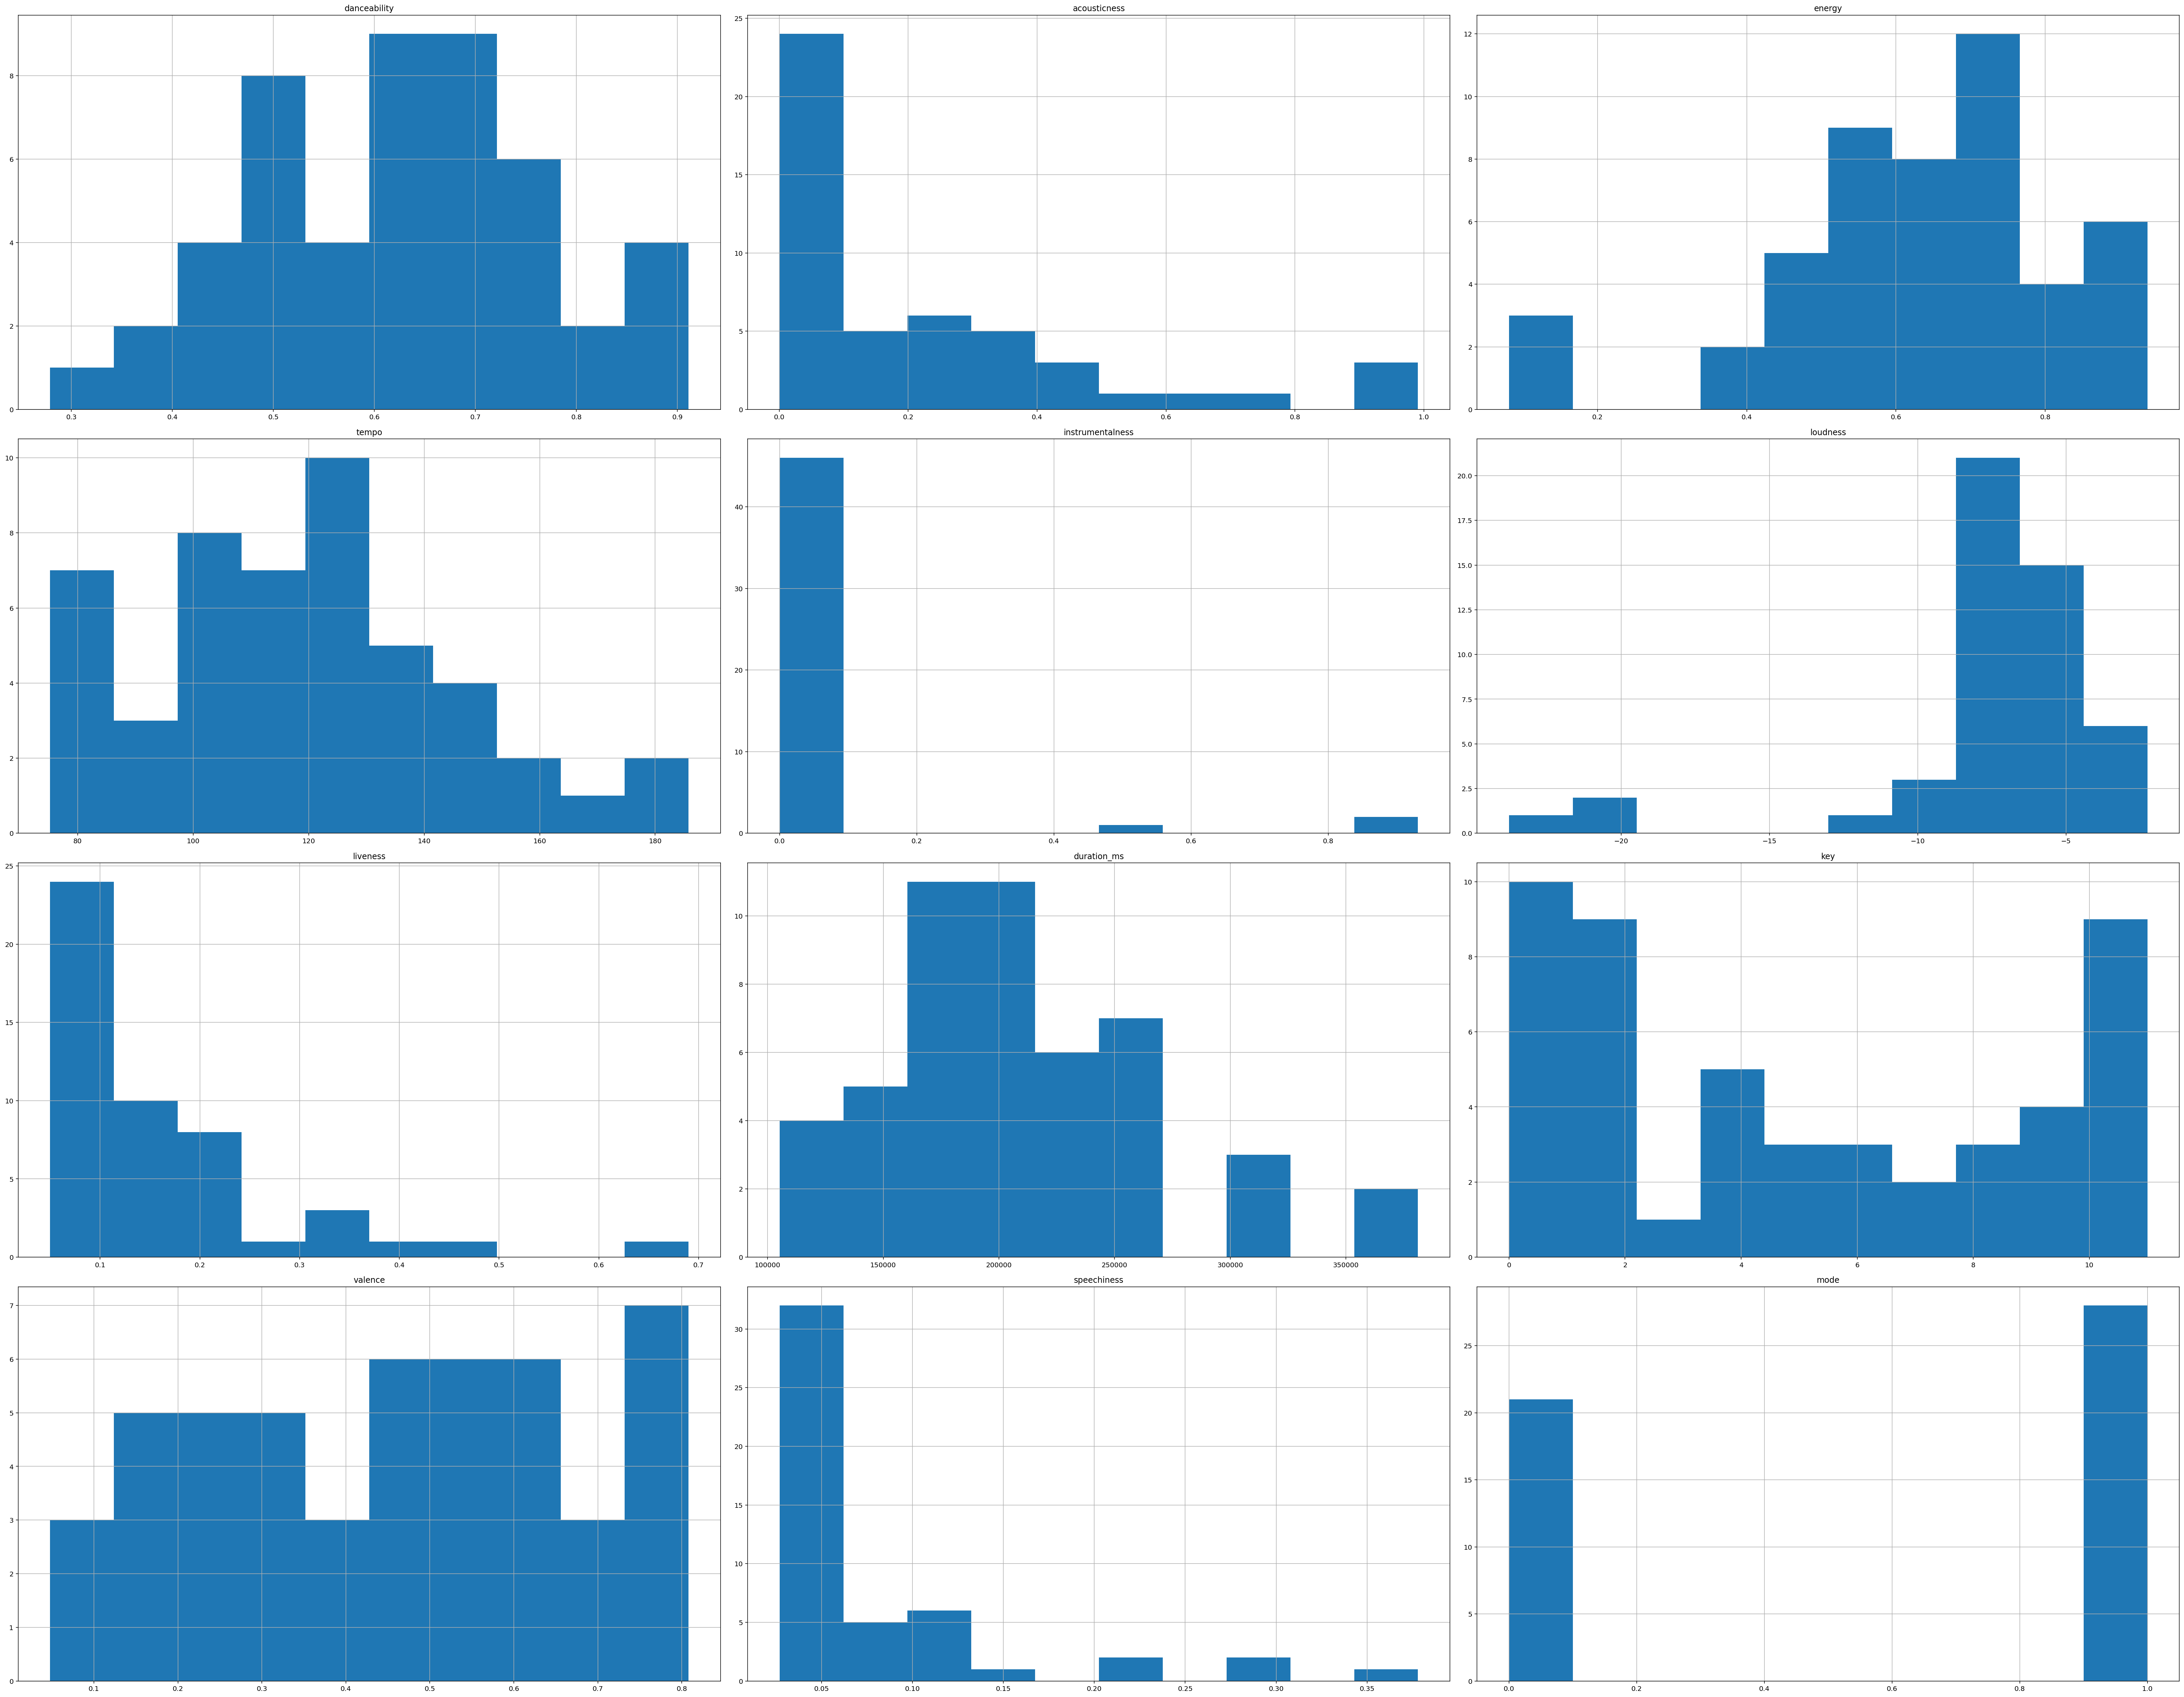

In [24]:
audio_features.hist(figsize=(45,35)) 
plt.tight_layout()
plt.show()

<AxesSubplot:>

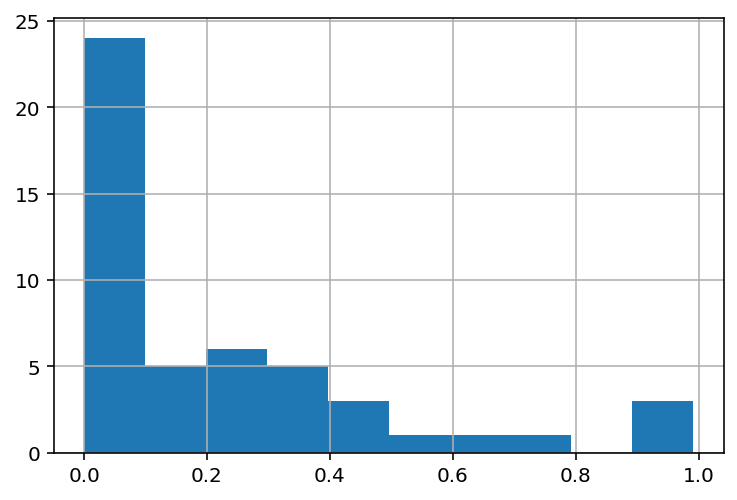

In [25]:
audio_features['acousticness'].hist() 

In [26]:
audio_features['instrumentalness'].iloc[25]

6.42e-05

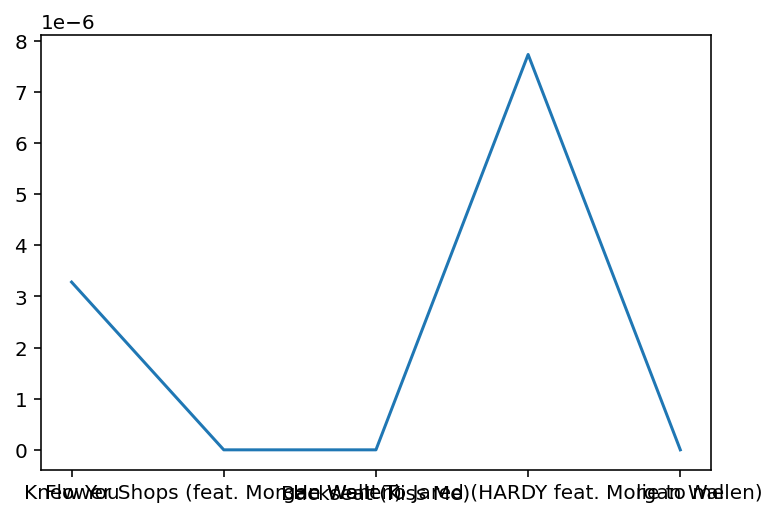

In [27]:
plt.plot(audio_features.head()['instrumentalness'])

## Features to encode

danceability
acousticness
energy
tempo
instrumentalness
loudness
liveness
duration_ms  
key
valence
speechiness
genres

In [28]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn import preprocessing

In [34]:
df = audio_features
#Selecting numerical variables
nds = df.select_dtypes(include=['float64',"int64"])
numerical_features = ['danceability', 'acousticness', 'energy', 'instrumentalness','liveness','valence','mode']

##Features to scale
#features_to_be_scaled=nds.drop(columns=['danceability', 'acousticness', 'energy', 'instrumentalness','liveness','valence','mode'])
features_to_be_scaled=nds.drop(columns=numerical_features)


#Scaling Numerical variables
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

#Applying scaler on our data and converting i into a data frame
ndsmx = pd.DataFrame((scaler.fit_transform(features_to_be_scaled)))
ndsmx.columns=features_to_be_scaled.columns 
normalized_data_set=pd.concat([df[numerical_features].reset_index(drop=True),ndsmx.reset_index(drop=True)],axis=1)
normalized_data_set.set_index(df.index)
normalized_data_set['instrumentalness'] = np.where((normalized_data_set.instrumentalness <(10**(-3))), 0, normalized_data_set.instrumentalness)

In [35]:
normalized_data_set

,danceability,acousticness,energy,instrumentalness,liveness,valence,mode,tempo,loudness,duration_ms,key,speechiness
0,0.624,0.007250,0.5620,0.00000,0.0937,0.4780,1,0.314048,0.805100,0.290673,0.000000,0.004557
1,0.527,0.118000,0.4610,0.00000,0.0831,0.2270,1,0.478658,0.830508,0.395721,0.636364,0.000000
2,0.750,0.111000,0.5480,0.00000,0.0633,0.4970,1,0.233286,0.747085,0.220578,0.181818,0.063515
3,0.565,0.054000,0.8060,0.00000,0.2040,0.6830,0,0.586598,0.867574,0.393142,0.818182,0.060666
4,0.642,0.015100,0.3920,0.00000,0.3520,0.0479,0,0.568332,0.740490,0.261802,0.363636,0.029336
5,0.667,0.006400,0.6790,0.00000,0.1700,0.3200,1,0.224447,0.797622,0.226175,0.000000,0.058673
6,0.521,0.042200,0.8830,0.00000,0.1050,0.8050,1,0.051903,0.928097,0.207749,0.090909,0.098832
7,0.715,0.028400,0.7960,0.00000,0.0658,0.4310,0,0.486683,0.877839,0.411307,0.363636,0.075477
8,0.865,0.289000,0.4980,0.00000,0.6900,0.8080,0,0.296895,0.718891,0.075761,0.636364,0.743663
9,0.472,0.012900,0.6710,0.00000,0.1590,0.0681,1,0.069725,0.888987,0.462364,0.363636,0.005981


<bound method NDFrame.head of                         danceability  acousticness  energy  instrumentalness  \
track_id                                                                       
7my1wrfnHqssb3mtHEPWrI         0.652      0.029100   0.715           0.00000   
1LKaiZTkocUx2oAKfm4Jk0         0.673      0.492000   0.367           0.00000   
3TCauNPqFiniaYHBvEVoHG         0.456      0.578000   0.573           0.00000   
1HR2CTi0ytRJIcik1QKdOa         0.727      0.251000   0.696           0.00000   
4OafepJy2teCjYJbvFE60J         0.568      0.021100   0.656           0.00000   
...                              ...           ...     ...               ...   
0L7zm6afBEtrNKo6C6Gj08         0.679      0.003760   0.866           0.00000   
5LyRtsQLhcXmy50VXhQXXS         0.262      0.006550   0.988           0.89700   
6fybp4N6eW3bsFAvARxyVe         0.342      0.000999   0.862           0.86200   
1brpdmqkx3kSxyqzqXfW7J         0.309      0.015800   0.649           0.00591   
5ZOOjqoCaU

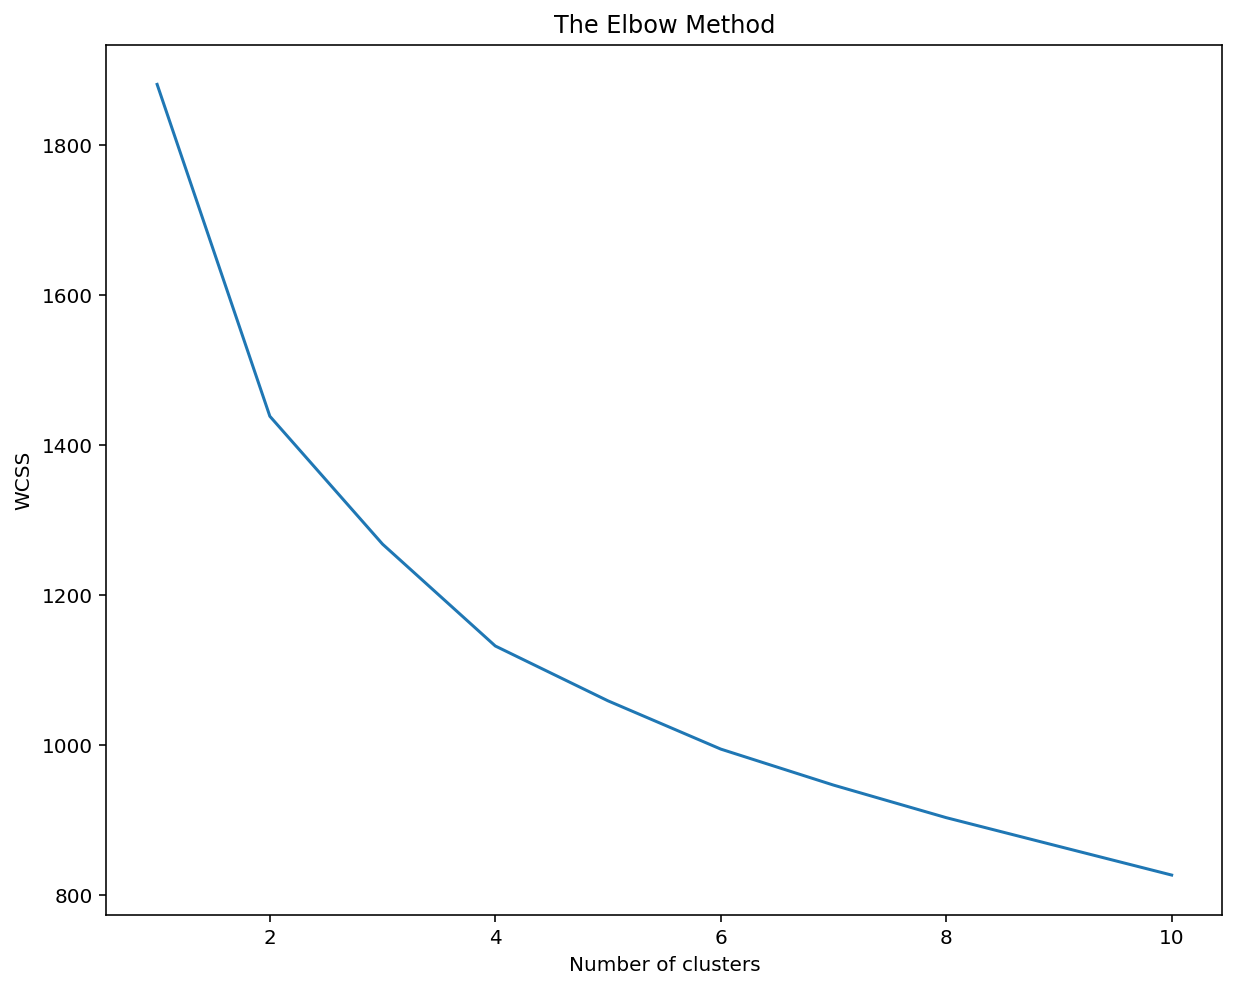

In [520]:
df1 = pd.read_csv('test.csv', index_col=0)
df1 = df1.drop_duplicates()
df1 = df1.dropna()
print (df1.head)
df = df1.iloc[: , :-1]
#df = normalized_data_set
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

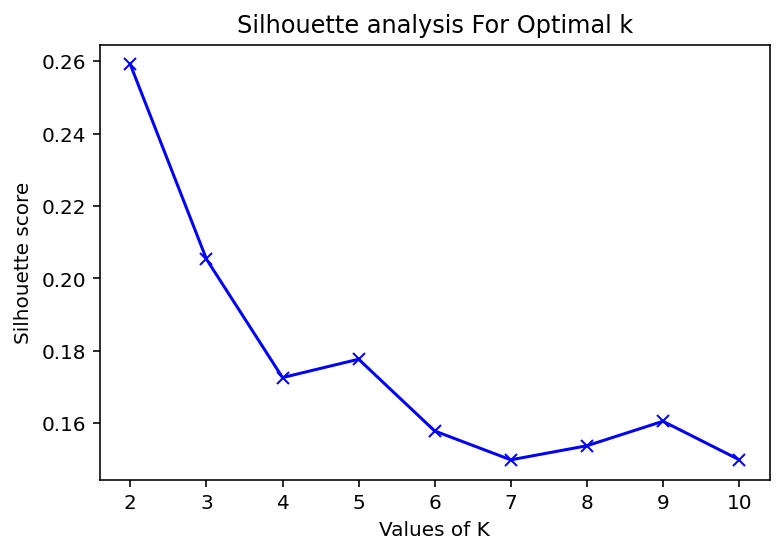

In [521]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in range(2, 11):
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))
n_clusters = np.argmax(silhouette_avg)+2
plt.plot(range(2, 11),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [522]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
#cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df['cluster'] = y_kmeans1
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,danceability,acousticness,energy,instrumentalness,liveness,valence,duration,popularity,tempo,loudness,speechiness
cluster,,,,,,,,,,,
1,0.5,0.6,0.4,0.1,0.2,0.4,0.1,0.4,0.4,0.7,0.0
2,0.6,0.1,0.8,0.0,0.2,0.5,0.2,0.5,0.4,0.8,0.1


In [523]:
print (df.head)

<bound method NDFrame.head of                         danceability  acousticness  energy  instrumentalness  \
track_id                                                                       
7my1wrfnHqssb3mtHEPWrI         0.652      0.029100   0.715           0.00000   
1LKaiZTkocUx2oAKfm4Jk0         0.673      0.492000   0.367           0.00000   
3TCauNPqFiniaYHBvEVoHG         0.456      0.578000   0.573           0.00000   
1HR2CTi0ytRJIcik1QKdOa         0.727      0.251000   0.696           0.00000   
4OafepJy2teCjYJbvFE60J         0.568      0.021100   0.656           0.00000   
...                              ...           ...     ...               ...   
0L7zm6afBEtrNKo6C6Gj08         0.679      0.003760   0.866           0.00000   
5LyRtsQLhcXmy50VXhQXXS         0.262      0.006550   0.988           0.89700   
6fybp4N6eW3bsFAvARxyVe         0.342      0.000999   0.862           0.86200   
1brpdmqkx3kSxyqzqXfW7J         0.309      0.015800   0.649           0.00591   
5ZOOjqoCaU

In [349]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(df.sample(49)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = df.columns

In [420]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding

#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [421]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["cluster"], axis=1)))

In [422]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [423]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [424]:
plotX["dummy"] = 0

In [425]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["cluster"] == 1]
cluster1 = plotX[plotX["cluster"] == 2]
cluster2 = plotX[plotX["cluster"] == 3]
cluster3 = plotX[plotX["cluster"] == 4]
cluster4 = plotX[plotX["cluster"] == 5]

In [426]:
#!pip install plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go


#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [427]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster4["PC1_1d"],
                    y = cluster4["dummy"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [428]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster4["PC1_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [429]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace5 = go.Scatter3d(
                    x = cluster4["PC1_3d"],
                    y = cluster4["PC2_3d"],
                    z = cluster4["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [524]:
#for cluster in range(n_clusters):
df2 = df.loc[df['cluster'] == 1]

In [530]:
df2.drop_duplicates()

,danceability,acousticness,energy,instrumentalness,liveness,valence,duration,popularity,tempo,loudness,speechiness,cluster
track_id,,,,,,,,,,,,
1LKaiZTkocUx2oAKfm4Jk0,0.673,0.4920,0.367,0.0000,0.3680,0.4810,0.130165,0.447917,0.596600,0.632300,0.222792,1
3TCauNPqFiniaYHBvEVoHG,0.456,0.5780,0.573,0.0000,0.1140,0.0992,0.149844,0.770833,0.170132,0.849473,0.004795,1
02iW5boMzeBDVRI0dRE1Yw,0.693,0.6210,0.410,0.0000,0.1010,0.2810,0.081662,0.604167,0.567171,0.785584,0.021855,1
6CbiLNbsn99SsKx5OzMWXC,0.643,0.4940,0.473,0.0000,0.2550,0.5350,0.132340,0.333333,0.538631,0.796283,0.252899,2
7u6DMPznGbpziuEgCE0JGQ,0.604,0.6570,0.449,0.0000,0.0932,0.5280,0.209818,0.677083,0.309629,0.775079,0.013492,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5o8OdhjVZSF2wCj7M8UpMN,0.338,0.5800,0.340,0.0032,0.1160,0.1970,0.204894,0.625000,0.206171,0.623835,0.011931,1
2lF8jQFhIjpmQa501sYXxR,0.697,0.4280,0.395,0.6530,0.1730,0.8760,0.256600,0.208333,0.386024,0.581619,0.005464,3
6PDBcqHNIg5cOojcCkhxYM,0.306,0.0857,0.398,0.0000,0.0756,0.0948,0.145504,0.552083,0.224580,0.604037,0.020071,1


In [525]:
print (df2)

                        danceability  acousticness  energy  instrumentalness  \
track_id                                                                       
1LKaiZTkocUx2oAKfm4Jk0         0.673        0.4920   0.367            0.0000   
3TCauNPqFiniaYHBvEVoHG         0.456        0.5780   0.573            0.0000   
02iW5boMzeBDVRI0dRE1Yw         0.693        0.6210   0.410            0.0000   
6CbiLNbsn99SsKx5OzMWXC         0.643        0.4940   0.473            0.0000   
7u6DMPznGbpziuEgCE0JGQ         0.604        0.6570   0.449            0.0000   
...                              ...           ...     ...               ...   
5o8OdhjVZSF2wCj7M8UpMN         0.338        0.5800   0.340            0.0032   
2lF8jQFhIjpmQa501sYXxR         0.697        0.4280   0.395            0.6530   
6PDBcqHNIg5cOojcCkhxYM         0.306        0.0857   0.398            0.0000   
3MODES4TNtygekLl146Dxd         0.483        0.4520   0.615            0.0000   
0QwZfbw26QeUoIy82Z2jYp         0.506    

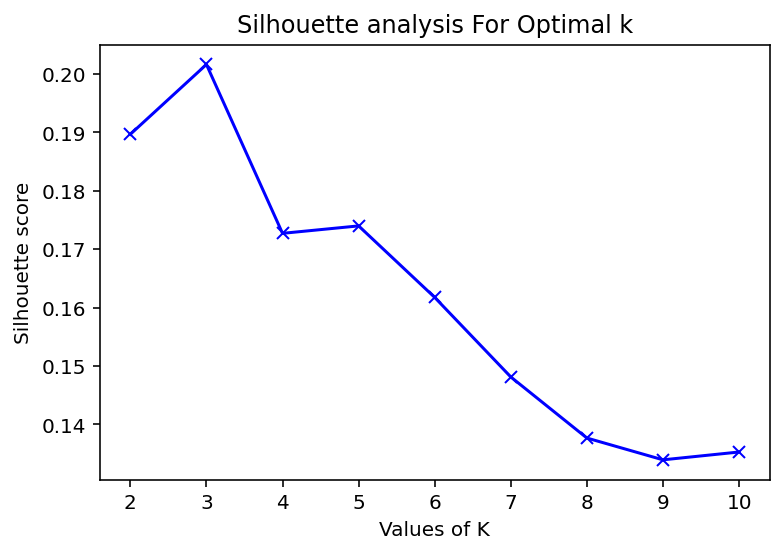

In [526]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in range(2, 11):
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(df2, cluster_labels))
n1_clusters = np.argmax(silhouette_avg)+2
plt.plot(range(2, 11),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [527]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = n1_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df2)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
#cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df2['cluster'] = y_kmeans1
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df2.groupby('cluster').mean(),1))
kmeans_mean_cluster

<ipython-input-527-bcfc03301dec>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,danceability,acousticness,energy,instrumentalness,liveness,valence,duration,popularity,tempo,loudness,speechiness
cluster,,,,,,,,,,,
1,0.5,0.6,0.4,0.0,0.2,0.4,0.1,0.6,0.4,0.7,0.0
2,0.6,0.6,0.4,0.0,0.2,0.4,0.1,0.1,0.4,0.7,0.1
3,0.4,0.8,0.3,0.8,0.2,0.3,0.1,0.4,0.4,0.5,0.0


In [528]:
df2

,danceability,acousticness,energy,instrumentalness,liveness,valence,duration,popularity,tempo,loudness,speechiness,cluster
track_id,,,,,,,,,,,,
1LKaiZTkocUx2oAKfm4Jk0,0.673,0.4920,0.367,0.0000,0.3680,0.4810,0.130165,0.447917,0.596600,0.632300,0.222792,1
3TCauNPqFiniaYHBvEVoHG,0.456,0.5780,0.573,0.0000,0.1140,0.0992,0.149844,0.770833,0.170132,0.849473,0.004795,1
02iW5boMzeBDVRI0dRE1Yw,0.693,0.6210,0.410,0.0000,0.1010,0.2810,0.081662,0.604167,0.567171,0.785584,0.021855,1
6CbiLNbsn99SsKx5OzMWXC,0.643,0.4940,0.473,0.0000,0.2550,0.5350,0.132340,0.333333,0.538631,0.796283,0.252899,2
7u6DMPznGbpziuEgCE0JGQ,0.604,0.6570,0.449,0.0000,0.0932,0.5280,0.209818,0.677083,0.309629,0.775079,0.013492,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5o8OdhjVZSF2wCj7M8UpMN,0.338,0.5800,0.340,0.0032,0.1160,0.1970,0.204894,0.625000,0.206171,0.623835,0.011931,1
2lF8jQFhIjpmQa501sYXxR,0.697,0.4280,0.395,0.6530,0.1730,0.8760,0.256600,0.208333,0.386024,0.581619,0.005464,3
6PDBcqHNIg5cOojcCkhxYM,0.306,0.0857,0.398,0.0000,0.0756,0.0948,0.145504,0.552083,0.224580,0.604037,0.020071,1


In [516]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(df2.sample(len(df2))))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = df2.columns

In [531]:
df2['user_id']= df1.loc[df2.index.values]['user_id'].values

ValueError: Length of values (1476) does not match length of index (1414)

In [463]:
p = 1
for cluster in range(n1_clusters):
    val =  df2[df2['cluster']==cluster+1]['user_id'].value_counts(normalize=True)[0]
    if (val<p):
        p = val
        o = cluster+1

In [532]:
df1.loc[df2.index.values].drop_duplicates()

,danceability,acousticness,energy,instrumentalness,liveness,valence,duration,popularity,tempo,loudness,speechiness,user_id
track_id,,,,,,,,,,,,
1LKaiZTkocUx2oAKfm4Jk0,0.673,0.4920,0.367,0.0000,0.3680,0.4810,0.130165,0.447917,0.596600,0.632300,0.222792,sanjsarda
3TCauNPqFiniaYHBvEVoHG,0.456,0.5780,0.573,0.0000,0.1140,0.0992,0.149844,0.770833,0.170132,0.849473,0.004795,sanjsarda
02iW5boMzeBDVRI0dRE1Yw,0.693,0.6210,0.410,0.0000,0.1010,0.2810,0.081662,0.604167,0.567171,0.785584,0.021855,sanjsarda
6CbiLNbsn99SsKx5OzMWXC,0.643,0.4940,0.473,0.0000,0.2550,0.5350,0.132340,0.333333,0.538631,0.796283,0.252899,sanjsarda
7u6DMPznGbpziuEgCE0JGQ,0.604,0.6570,0.449,0.0000,0.0932,0.5280,0.209818,0.677083,0.309629,0.775079,0.013492,sanjsarda
...,...,...,...,...,...,...,...,...,...,...,...,...
3MODES4TNtygekLl146Dxd,0.468,0.0720,0.607,0.0000,0.2250,0.8860,0.167644,0.760417,0.298511,0.642640,0.011597,5bc0pbn945ysud6gky5r0uic9
3MODES4TNtygekLl146Dxd,0.512,0.0278,0.840,0.1420,0.0770,0.0589,0.167644,0.760417,0.506540,0.768102,0.025870,5bc0pbn945ysud6gky5r0uic9
3MODES4TNtygekLl146Dxd,0.483,0.4520,0.615,0.0000,0.0512,0.5940,0.167644,0.760417,0.195451,0.720647,0.029550,5bc0pbn945ysud6gky5r0uic9


In [392]:
df.index

Index(['0WfV9XwpkldKdjzw4qoyAd', '2ccuOtUjIyx3tPcsnpeBzJ',
       '7dbnw3cDgeDxOxJJ7QiAiD', '25uzAwyPekZtWzlLVvUYNS',
       '4f9IfFvBFm7Gsf1IVEudyf', '655sojH8GGEteZTBJOFyy7',
       '4ks4jp4jGsmffhbUegLG6S', '4YeKAwFn69ehnciOfi7Sbf',
       '6PGJZEvtlf2EJPu9VLqI3q', '77loZpT5Y5PRP1S451P9Yz',
       '2qPesmvW3Ybks41YWlstf1', '41OtlB4xN40fRSpq6b4QNS',
       '0x3TibRgnSqzkcwrqBd4iX', '748mdHapucXQri7IAO8yFK',
       '6ip4lEjzq1GQHIuikQBiZa', '0ODaBMQ3tbTefbmbMWTwdT',
       '0gMfgLE3milkpO6Umr3aAC', '5d1OeQBC6zyHO8jc2svOZz',
       '40LQiUUUKXVGyNs09lHVjW', '6tsOcBnaKgzK22yEiqRh8P',
       '7bCfHiRcfUjG0YVVNUL7Ve', '1nFwdOtgSlwlauOjoWX5qv',
       '2fTdRdN73RgIgcUZN33dvt', '1p9rgYTrfwr2vfSlHXHOyn',
       '2S2od3hT7ceytw7d1pTRuE', '25R4HkFnzQvgMA6XOJuh4K',
       '1fTWBmJnCUXXCFvw41ZKgy', '1aBCdCoHR7AwWQbiWEHdzA',
       '1PTQ22h4JKA2u6BTbuZ5Oc', '17zF2ISrDrQdaULA8cxReK',
       '4VLbLC655t2SA7MvtKwYJ5', '3RqU6RJ9TiTN0AAGiaq7hR',
       '6bBsaqsxVchRk0jCM5BAoe', '7LjEQ8GsQiUNVakV6TZI0e

In [464]:
print (o)

1


In [455]:
final = df2[df2['cluster']==o]
final

,danceability,acousticness,energy,instrumentalness,liveness,valence,mode,tempo,loudness,duration_ms,key,speechiness,cluster,user_id
track_id,,,,,,,,,,,,,,
25uzAwyPekZtWzlLVvUYNS,0.565,0.054000,0.806,0.00000,0.2040,0.683,0,0.495186,0.710197,0.196832,0.818182,0.066251,2,sanjsarda
0gMfgLE3milkpO6Umr3aAC,0.762,0.009650,0.552,0.00000,0.1250,0.734,0,0.162330,0.566726,0.130972,1.000000,0.085221,2,sanjsarda
2fTdRdN73RgIgcUZN33dvt,0.737,0.039800,0.867,0.00000,0.3200,0.506,0,0.162614,0.965206,0.128233,1.000000,0.059456,2,sanjsarda
2S2od3hT7ceytw7d1pTRuE,0.664,0.188000,0.738,0.00000,0.1350,0.203,0,0.336068,0.800984,0.161043,0.818182,0.025481,2,sanjsarda
1fTWBmJnCUXXCFvw41ZKgy,0.730,0.015800,0.704,0.00000,0.0515,0.898,0,0.573593,0.557066,0.221332,0.909091,0.095696,2,sanjsarda
17zF2ISrDrQdaULA8cxReK,0.693,0.049600,0.813,0.00000,0.2890,0.515,0,0.098986,0.777191,0.243557,0.636364,0.116648,2,sanjsarda
3RqU6RJ9TiTN0AAGiaq7hR,0.722,0.196000,0.699,0.00462,0.1110,0.613,0,0.273247,0.794365,0.250379,0.727273,0.007361,2,sanjsarda
6bBsaqsxVchRk0jCM5BAoe,0.626,0.117000,0.840,0.00000,0.2160,0.737,0,0.526857,0.546064,0.199203,0.909091,0.080691,2,sanjsarda
7szRiHu6r91o2Po9GTPN4c,0.702,0.568000,0.711,0.00000,0.1040,0.498,0,0.177948,0.568247,0.211682,0.545455,0.000000,2,sanjsarda


In [465]:
final1 = df2[df2['cluster']==o]
final1

,danceability,acousticness,energy,instrumentalness,liveness,valence,mode,tempo,loudness,duration_ms,key,speechiness,cluster,user_id
track_id,,,,,,,,,,,,,,
0WfV9XwpkldKdjzw4qoyAd,0.624,0.007250,0.562,0.00000,0.0937,0.4780,1,0.256830,0.589893,0.145530,0.000000,0.010476,1,sanjsarda
7dbnw3cDgeDxOxJJ7QiAiD,0.750,0.111000,0.548,0.00000,0.0633,0.4970,1,0.186200,0.478175,0.110436,0.181818,0.069083,1,sanjsarda
655sojH8GGEteZTBJOFyy7,0.667,0.006400,0.679,0.00000,0.1700,0.3200,1,0.178470,0.575492,0.113238,0.000000,0.064270,1,sanjsarda
4ks4jp4jGsmffhbUegLG6S,0.521,0.042200,0.883,0.00000,0.1050,0.8050,1,0.027573,0.826744,0.104013,0.090909,0.104190,1,sanjsarda
77loZpT5Y5PRP1S451P9Yz,0.472,0.012900,0.671,0.00000,0.1590,0.0681,1,0.043160,0.751431,0.231489,0.363636,0.011891,1,sanjsarda
41OtlB4xN40fRSpq6b4QNS,0.495,0.491000,0.550,0.00000,0.2160,0.0500,1,0.163501,0.414401,0.169033,0.181818,0.152039,1,sanjsarda
0x3TibRgnSqzkcwrqBd4iX,0.700,0.036900,0.598,0.00000,0.1110,0.5940,1,0.653084,0.471109,0.223605,0.181818,0.252548,1,sanjsarda
0ODaBMQ3tbTefbmbMWTwdT,0.463,0.037900,0.760,0.00000,0.1150,0.6500,1,0.367131,0.634347,0.107327,0.181818,0.241223,1,sanjsarda
40LQiUUUKXVGyNs09lHVjW,0.476,0.021700,0.736,0.00000,0.2030,0.2510,1,0.408154,0.686047,0.284187,0.181818,0.026897,1,sanjsarda
